**Sentimental Analysis**

---



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
reviews =pd.read_csv("skytrax_reviews.csv")
reviews['Airport Name'] = reviews['Airport Name'].str.replace('/airport-reviews/', '', regex=False)
reviews_uk = reviews[reviews['Airport Name'].isin(['manchester-airport', 'london-stansted-airport',
                                                   'liverpool-airport', 'london-city-airport', 'london-gatwick-airport',
                                                   'london-heathrow-airport', 'southampton-airport', 'luton-airport'])]
reviews_uk.head()


,Airport Name,Reviewer Name,Review Date,Reviewer Country,Review_Title,Review Rating,Review Verified Status,reviews.text,Experience At Airport,Date Visit,Type Of Traveller,Queuing Times,Terminal Cleanliness,Terminal Seating,Terminal Signs,Food Beverages,Airport Shopping,Wifi Connectivity,Airport Staff,Recommended
19619,liverpool-airport,Stanley Edgar,11th July 2020,United Kingdom,"""surly and rude security staff""",1.0,Not Verified,In decades of flying. I have never need such s...,Departure Only,Jul-20,Business,2.0,1.0,2.0,3.0,2.0,2.0,NaN,1.0,no
19620,liverpool-airport,Lisa Marshall-Bell,23rd March 2020,United Kingdom,"""who gives you the right to put us all at sign...",1.0,Not Verified,Covid 19 government demand social distancing. ...,Departure Only,Mar-20,Business,1.0,3.0,1.0,4.0,NaN,2.0,NaN,1.0,no
19621,liverpool-airport,Ciiku Son,24th February 2020,United Kingdom,"""stop letting down our city""",5.0,Not Verified,Pros: the checking in and security is fast. Th...,Arrival and Departure,Feb-20,Family Leisure,5.0,3.0,2.0,5.0,1.0,1.0,3.0,4.0,yes
19622,liverpool-airport,Pat Libery,20th January 2020,Canada,"""Almost as bad as Manchester airport""",1.0,Not Verified,I had a terrible experience transiting in this...,Transit,Jan-20,Business,1.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,no
19623,liverpool-airport,Constantine O Connor,18th January 2020,France,"""dirty, shabby, chaotic and rough""",1.0,Not Verified,"The airport was dirty, shabby, chaotic and rou...",Transit,Jan-20,Business,1.0,1.0,1.0,3.0,1.0,2.0,3.0,3.0,no


In [5]:
reviews_uk.describe()

,Review Rating,Queuing Times,Terminal Cleanliness,Terminal Seating,Terminal Signs,Food Beverages,Airport Shopping,Wifi Connectivity,Airport Staff
count,4241.000000,4582.000000,4558.000000,2365.000000,2726.000000,2086.000000,3608.000000,1599.000000,2486.000000
mean,3.130394,2.065474,2.730364,1.937844,2.464050,2.281400,2.618902,2.127580,1.925583
std,2.709474,1.418249,1.321288,1.221955,1.368315,1.268285,1.317704,1.335932,1.297146
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
reviews_uk.head()

,Airport Name,Reviewer Name,Review Date,Reviewer Country,Review_Title,Review Rating,Review Verified Status,reviews.text,Experience At Airport,Date Visit,Type Of Traveller,Queuing Times,Terminal Cleanliness,Terminal Seating,Terminal Signs,Food Beverages,Airport Shopping,Wifi Connectivity,Airport Staff,Recommended
19619,liverpool-airport,Stanley Edgar,11th July 2020,United Kingdom,"""surly and rude security staff""",1.0,Not Verified,In decades of flying. I have never need such s...,Departure Only,Jul-20,Business,2.0,1.0,2.0,3.0,2.0,2.0,NaN,1.0,no
19620,liverpool-airport,Lisa Marshall-Bell,23rd March 2020,United Kingdom,"""who gives you the right to put us all at sign...",1.0,Not Verified,Covid 19 government demand social distancing. ...,Departure Only,Mar-20,Business,1.0,3.0,1.0,4.0,NaN,2.0,NaN,1.0,no
19621,liverpool-airport,Ciiku Son,24th February 2020,United Kingdom,"""stop letting down our city""",5.0,Not Verified,Pros: the checking in and security is fast. Th...,Arrival and Departure,Feb-20,Family Leisure,5.0,3.0,2.0,5.0,1.0,1.0,3.0,4.0,yes
19622,liverpool-airport,Pat Libery,20th January 2020,Canada,"""Almost as bad as Manchester airport""",1.0,Not Verified,I had a terrible experience transiting in this...,Transit,Jan-20,Business,1.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,no
19623,liverpool-airport,Constantine O Connor,18th January 2020,France,"""dirty, shabby, chaotic and rough""",1.0,Not Verified,"The airport was dirty, shabby, chaotic and rou...",Transit,Jan-20,Business,1.0,1.0,1.0,3.0,1.0,2.0,3.0,3.0,no


In [9]:
reviews_uk.loc[:, 'compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews_uk['reviews.text']]
reviews_uk.loc[:, 'neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews_uk['reviews.text']]
reviews_uk.loc[:, 'neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews_uk['reviews.text']]
reviews_uk.loc[:, 'pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews_uk['reviews.text']]


<ipython-input-9-11c6035f6c24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_uk.loc[:, 'compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews_uk['reviews.text']]
<ipython-input-9-11c6035f6c24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_uk.loc[:, 'neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews_uk['reviews.text']]
<ipython-input-9-11c6035f6c24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [10]:
reviews_uk[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,4716.000000,4716.000000,4716.00000,4716.000000
mean,-0.103000,0.102622,0.80433,0.093046
std,0.740218,0.066735,0.07732,0.065209
min,-0.997400,0.000000,0.38400,0.000000
25%,-0.838275,0.056000,0.76300,0.049000
50%,-0.304200,0.095000,0.81200,0.082000
75%,0.718400,0.138000,0.85600,0.124000
max,0.998600,0.486000,1.00000,0.516000


<Axes: xlabel='compound', ylabel='Count'>

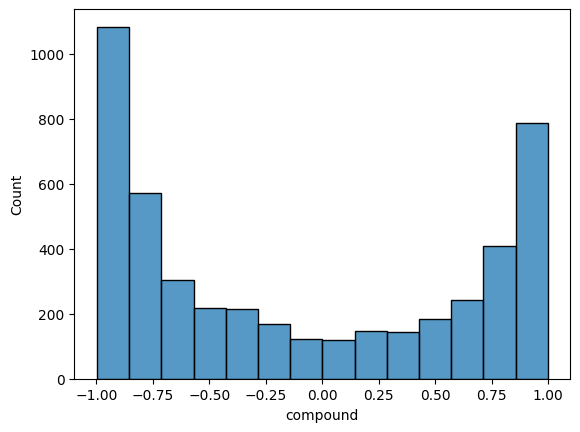

In [11]:
sns.histplot(reviews_uk['compound'])

<Axes: xlabel='pos', ylabel='Count'>

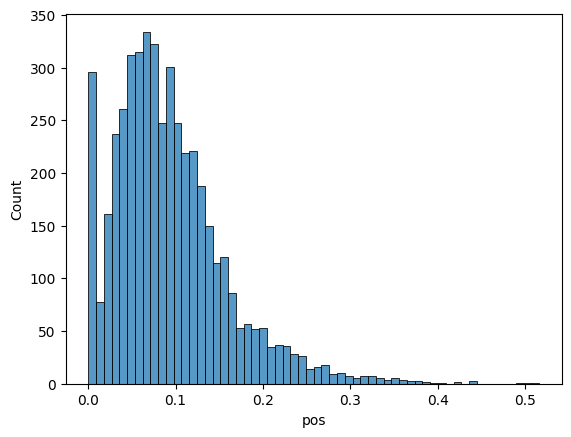

In [12]:
sns.histplot(reviews_uk['pos'])

<Axes: xlabel='neu', ylabel='Count'>

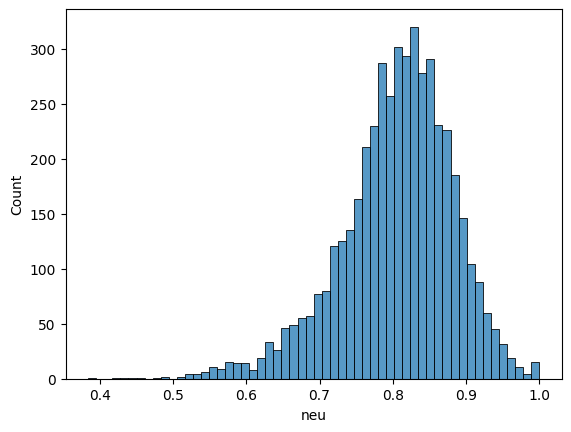

In [13]:
sns.histplot(reviews_uk['neu'])

<Axes: xlabel='neg', ylabel='Count'>

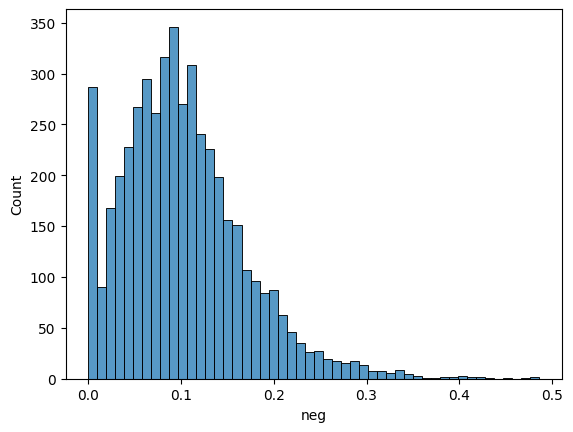

In [14]:
sns.histplot(reviews_uk['neg'])

In [15]:
(reviews_uk['compound']<=0).groupby(reviews_uk['Airport Name']).sum()


Airport Name
liverpool-airport           84
london-city-airport         45
london-gatwick-airport     278
london-heathrow-airport    384
london-stansted-airport    563
luton-airport              536
manchester-airport         759
southampton-airport         34
Name: compound, dtype: int64

In [17]:
percent_negative = pd.DataFrame((reviews_uk['compound']<=0).groupby(reviews_uk['Airport Name']).sum()
/reviews_uk['Airport Name'].groupby(reviews_uk['Airport Name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

# selected_airports_data = percent_negative.loc[['manchester-airport', 'london-stansted-airport']]

percent_negative

,% negative reviews
Airport Name,
london-city-airport,37.190083
southampton-airport,41.463415
london-heathrow-airport,41.784548
liverpool-airport,44.680851
london-gatwick-airport,54.085603
manchester-airport,61.308562
london-stansted-airport,64.050057
luton-airport,69.161290


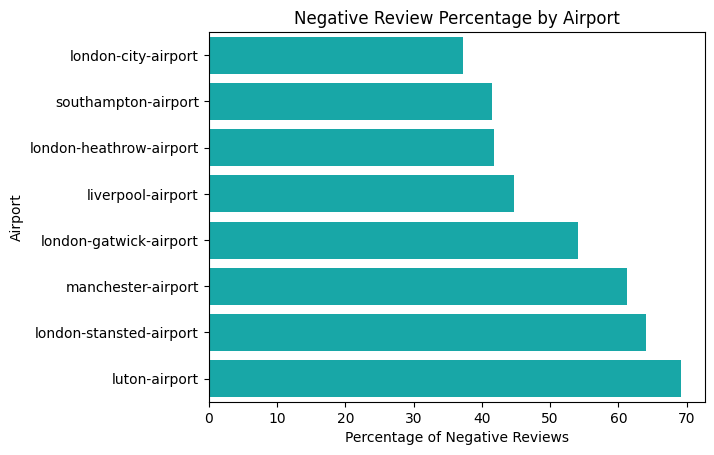

In [18]:
# # sns.barplot(data=manchester_airport_data,x='% negative reviews',y=percent_negative.index, color='c')

# Plotting the data for UK Airport
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

plt.xlabel('Percentage of Negative Reviews')
plt.ylabel('Airport')
plt.title('Negative Review Percentage by Airport')

# Display the plot
plt.show()



In [19]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Stemming (optional)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Re-join tokens into a string
    text = ' '.join(stemmed_tokens)

    return text



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
reviews_uk['processed_review'] = reviews_uk['reviews.text'].apply(preprocess_text)

# For positive reviews
reviews_positive_subset = reviews_uk.loc[(reviews_uk['Airport Name'] == 'luton-airport')
    & (reviews_uk['compound']>0),:]

# For negative reviews
reviews_negative_subset = reviews_uk.loc[(reviews_uk['Airport Name'] == 'luton-airport')
    & (reviews_uk['compound']<=0),:]

# Display the first few rows of the positive reviews subset
reviews_negative_subset.head()

<ipython-input-20-ec4cc154c496>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_uk['processed_review'] = reviews_uk['reviews.text'].apply(preprocess_text)


,Airport Name,Reviewer Name,Review Date,Reviewer Country,Review_Title,Review Rating,Review Verified Status,reviews.text,Experience At Airport,Date Visit,...,Food Beverages,Airport Shopping,Wifi Connectivity,Airport Staff,Recommended,compound,neg,neu,pos,processed_review
22742,luton-airport,C James,10th February 2020,United Kingdom,"""Avoid this airport if you can""",1.0,Trip Verified,Dreadful airport. Suffers overcrowding in depa...,Departure Only,Feb-20,...,3.0,4.0,3.0,1.0,no,-0.8885,0.203,0.764,0.034,dread airport suffer overcrowd departur “ loun...
22743,luton-airport,Benjamin Lundstrøm,26th January 2020,Denmark,"""beyond ridiculous""",1.0,Trip Verified,Almost did a withdrawal of €200 on a Danish Vi...,Departure Only,Jan-20,...,NaN,NaN,NaN,NaN,no,-0.8115,0.123,0.840,0.037,almost withdraw €200 danish visa card notic ma...
22744,luton-airport,S Rah,15th January 2020,United Kingdom,"""3rd world airport and mentality""",1.0,Not Verified,Worst airport. Security very rude and harsh to...,Departure Only,Oct-19,...,1.0,1.0,1.0,1.0,no,-0.9568,0.345,0.596,0.060,worst airport secur rude harsh mother babe pat...
22745,luton-airport,Harry Banks,5th January 2020,United Kingdom,"""airport genuinely makes me ashamed to be Brit...",1.0,Not Verified,Absolutely shameful 3rd world airport. This ai...,Arrival and Departure,Jan-20,...,1.0,1.0,1.0,2.0,no,-0.8805,0.346,0.539,0.114,absolut shame 3rd world airport airport genuin...
22746,luton-airport,R Kruse,29th December 2019,United Kingdom,"""All the wrong priorities""",3.0,Not Verified,"Shiny shops, dirty old and few toilets. All th...",Departure Only,Dec-19,...,3.0,4.0,NaN,NaN,no,-0.4031,0.283,0.507,0.211,shini shop dirti old toilet wrong prioriti lea...


In [42]:
!pip install nltk matplotlib wordcloud

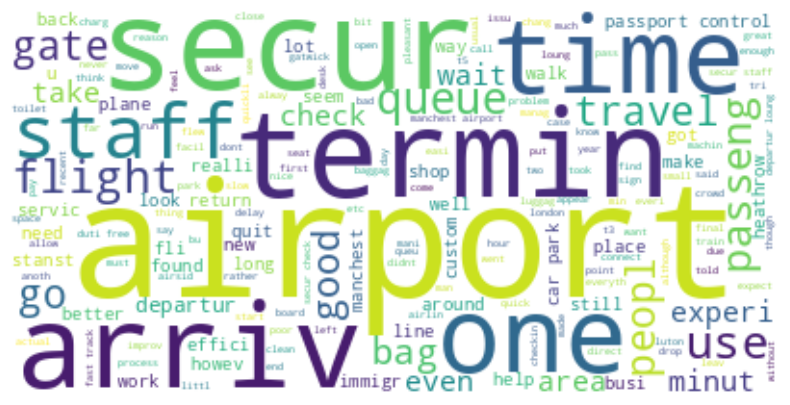

In [45]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review.split()]

# Generate a word cloud from the combined words
wordcloud = WordCloud(background_color="white").generate_from_text(' '.join(pos_tokens))

# Display the generated word cloud
plt.figure(figsize=(10, 5))  # Adjusted figsize for better visibility
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

airport   secur  termin    time   staff  flight   queue   arriv     get     use 
   3042    2282    1438    1411    1311    1299    1284    1241    1229    1081 


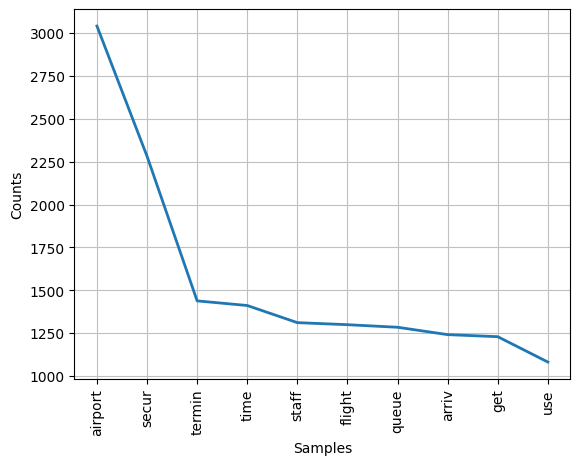

<Axes: xlabel='Samples', ylabel='Counts'>

In [56]:
freq_dist_pos = FreqDist(pos_tokens)
freq_dist_pos.tabulate(10)  # Display the 10 most common words
freq_dist_pos.plot(10)

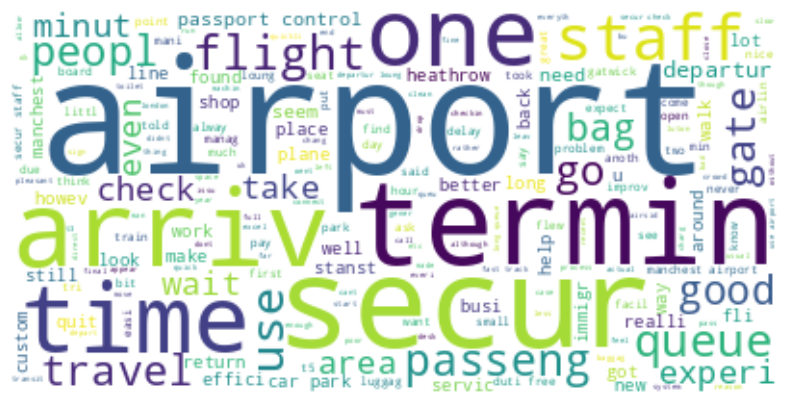

In [46]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review.split()]

# Generate a word cloud from the combined words
wordcloud = WordCloud(background_color="white").generate_from_text(' '.join(pos_tokens))

# Display the generated word cloud
plt.figure(figsize=(10, 5))  # Adjusted figsize for better visibility
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

airport   secur   staff  flight   queue     get    time   arriv     use    wait 
   4430    1940    1909    1780    1721    1705    1623    1593    1316    1297 


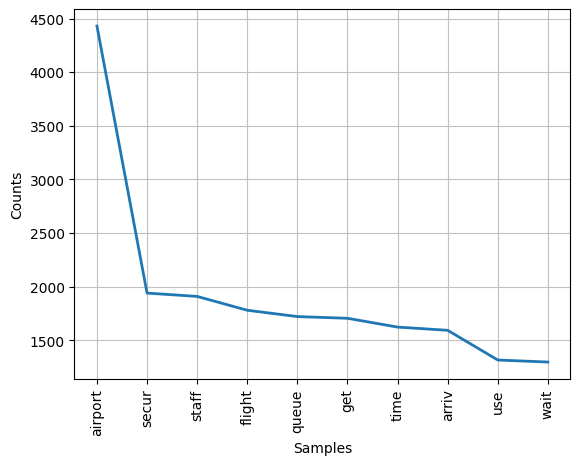

<Axes: xlabel='Samples', ylabel='Counts'>

In [58]:
freq_dist_neg = FreqDist(neg_tokens)
freq_dist_neg.tabulate(10)  # Display the 10 most common words
freq_dist_neg.plot(10)

**Text Classification Task**

---



In [28]:
textminingdata = reviews[['Recommended', 'reviews.text']]
textminingdata.head()

,Recommended,reviews.text
0,no,Worst and most chaotic airport transfer I have...
1,yes,The best airport in the world. I have used it ...
2,yes,The baggage claim areas have obviously been me...
3,yes,A small very effective airport with few flight...
4,yes,This is a nice and modern airport at the momen...


In [29]:
print("\n All Data Labels")
print(textminingdata.groupby("Recommended").count())


 All Data Labels
             reviews.text
Recommended              
no                  29064
yes                  9790


In [30]:
textminingdata['reviews.text'] = textminingdata['reviews.text'].apply(preprocess_text)

<ipython-input-30-7a0999b07366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textminingdata['reviews.text'] = textminingdata['reviews.text'].apply(preprocess_text)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(textminingdata['reviews.text'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,33333,33334,33335,33336,33337,33338,33339,33340,33341,33342
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
y = textminingdata ['Recommended']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3,random_state=42)

<Axes: xlabel='Recommended', ylabel='count'>

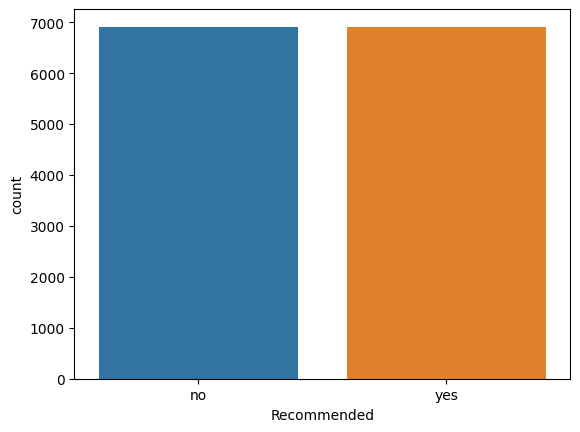

In [34]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled)

In [35]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_undersampled, y_train_undersampled)

MultinomialNB()

In [36]:
y_pred = model.predict(X_test)

from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test, y_pred)
print("Confusion mATRIX:")
print (cm, '\n\n')
print('---------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print(result)

accracy:0.76


Confusion mATRIX:
[[6512 2266]
 [ 540 2339]] 


---------------------------
Classification Report:

              precision    recall  f1-score   support

          no       0.92      0.74      0.82      8778
         yes       0.51      0.81      0.63      2879

    accuracy                           0.76     11657
   macro avg       0.72      0.78      0.72     11657
weighted avg       0.82      0.76      0.77     11657

